<a href="https://colab.research.google.com/github/solstice-janvi/datapreprocessing/blob/main/Shap%2Cmrmr%2Cboruta%2CSMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install shap

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgboost.XGBRegressor().fit(X_train, y_train)

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values,X_test[0], feature_names=feature_names)

In [ ]:
base_value = explainer.expected_value
shap_sum = shap_values[0].values.sum()
actual_prediction = base_value + shap_sum
print("base_value:", base_value)
print("shap_sum:", shap_sum)
print("actual_prediction:", actual_prediction)

base_value: 153.73622
shap_sum: 29.823746
actual_prediction: 183.55997


In [ ]:
shap_values[0]

.values =
array([ 12.8634815,   5.446424 , -10.192123 ,  -1.8062747,  -1.4830564,
         2.1746678,  -3.742843 ,  -0.818177 ,  29.371687 ,  -1.9900395],
      dtype=float32)

.base_values =
153.73622

.data =
array([ 0.04534098, -0.04464164, -0.00620595, -0.01599898,  0.1250187 ,
        0.1251981 ,  0.019187  ,  0.03430886,  0.03243232, -0.0052198 ])

In [ ]:
X_test[0]

array([ 0.04534098, -0.04464164, -0.00620595, -0.01599898,  0.1250187 ,
        0.1251981 ,  0.019187  ,  0.03430886,  0.03243232, -0.0052198 ])

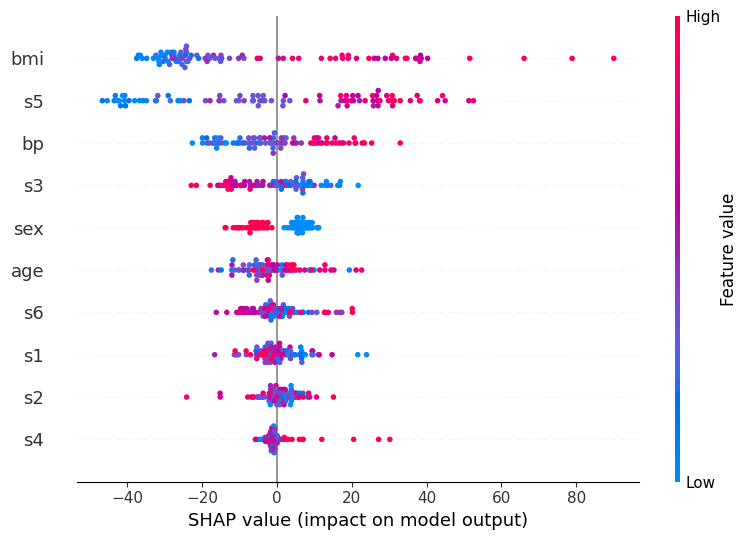

In [ ]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [1]:
pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 1.8 MB/s eta 0:00:00


In [5]:
pip install mrmr_selection


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.6 MB/s eta 0:00:00


In [6]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from mrmr import mrmr_classif
from sklearn.datasets import make_classification

In [7]:
X,y = make_classification(n_samples=1000, n_features=50, n_informative=10, random_state=40)


In [8]:
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

In [9]:
forest = RandomForestRegressor(
   n_jobs=-1,
   max_depth=5
)
boruta = BorutaPy(
   estimator=forest,
   n_estimators='auto',
   max_iter=100 # number of trials to perform
)

In [10]:
boruta.fit(np.array(X), np.array(y))

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=200,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x7D289F456C40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7D289F456C40)

In [11]:
accepted = X[:,boruta.support_]
tentative = X[:,boruta.support_weak_]
print('features in the accepted area:',accepted.shape)
print('features in the tentative area:',tentative.shape)

features in the accepted area: (1000, 12)
features in the tentative area: (1000, 0)


In [1]:
pip install imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
# Create synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)

# Check class distribution
print("Before SMOTE:", Counter(y))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Before SMOTE: Counter({0: 897, 1: 103})


In [4]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("After SMOTE:", Counter(y_resampled))

After SMOTE: Counter({1: 722, 0: 722})
